In [4]:
!pip install qiskit
import qiskit as q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.4 MB/s 
     |████████████████████████████████| 18.0 MB 222 kB/s 
     |████████████████████████████████| 240 kB 46.4 MB/s 
     |████████████████████████████████| 198 kB 57.8 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 61.7 MB/s 
     |████████████████████████████████| 1.6 MB 37.5 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 943 kB 59.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 27.6 MB/s 
     |████████████████████████████████| 112 kB 58.8 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=97bebc75ff

In [5]:
!pip install pylatexenc
import pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.1 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=7f3f5ed08c1d09087372b415e439f535a493608aed956906cd68b3b65ec34df0
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit import QuantumRegister
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
import matplotlib.pyplot as plt

sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit


In [7]:
import time
import matplotlib.pyplot as plt
from IPython import display
True

True

In [36]:
import numpy as np
from qiskit.circuit.library import Diagonal
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit import IBMQ, Aer, assemble, transpile


In [9]:
def fun(a,b,c):
  fun= (not c or (a and (not b)))
  if fun==True:
    fun=1
  else :
    fun=0
  return fun

In [25]:
diag=np.arange(1024).reshape(32,32)
for m in [0,1]:
  for q in [0,1]:
    for i in [0,1]:
        if i==0:
           a=False
        else :
            a=True
        for j in [0,1]:
           if j==0:
              b=False
           else :
              b=True 
           for k in [0,1]:
                if k==0:
                   c=False
                else :
                   c=True 
                z=m*(16)+q*(8)+i*(4)+j*(2)+k
                for y in range(0,32):
                     if y==z:
                        diag[y,z]=(-1)**(fun(a,b,c)) 
                     else:
                        diag[y,z]=0
print(diag)

[[-1  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0 -1 ...  0  0  0]
 ...
 [ 0  0  0 ... -1  0  0]
 [ 0  0  0 ...  0 -1  0]
 [ 0  0  0 ...  0  0  1]]


In [98]:
n=5
diffuse_operator = 2 * DensityMatrix.from_label(n * '0') - Operator.from_label(n * 'I')
diffuse_circuit = Diagonal(diffuse_operator.data.diagonal())
print(diffuse_operator) 

DensityMatrix([[ 1.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
               [ 0.+0.j, -1.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
               [ 0.+0.j,  0.+0.j, -1.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
               ...,
               [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -1.+0.j,  0.+0.j,  0.+0.j],
               [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, -1.+0.j,  0.+0.j],
               [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j, -1.+0.j]],
              dims=(2, 2, 2, 2, 2))


In [93]:
#oracle code
ora=QuantumCircuit(5,name='oracle')
racl=Operator(diag)
ora.unitary(racl,[0,1,2,3,4],label='ora')
ora.draw()

┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1     ├
     │      │
q_2: ┤2 ora ├
     │      │
q_3: ┤3     ├
     │      │
q_4: ┤4     ├
     └──────┘

In [101]:
grov_qr = QuantumRegister(5)
grov_qc = QuantumCircuit(grov_qr, name='Ora')
grov_qc.h([0,1,2,3,4])
grov_qc.append(ora,[0,1,2,3,4])
grov_qc.h([0,1,2,3,4])
grov_qc.append(diffuse_circuit,[0,1,2,3,4])
grov_qc.h([0,1,2,3,4])
grov_qc.append(ora,[0,1,2,3,4])
grov_qc.h([0,1,2,3,4])
grov_qc.append(diffuse_circuit,[0,1,2,3,4])
grov_qc.h([0,1,2,3,4])



grov_qc.measure_all()
grov_qc.draw()

┌───┐┌─────────┐┌───┐┌───────────┐┌───┐┌─────────┐┌───┐┌───────────┐»
q1188_0: ┤ H ├┤0        ├┤ H ├┤0          ├┤ H ├┤0        ├┤ H ├┤0          ├»
         ├───┤│         │├───┤│           │├───┤│         │├───┤│           │»
q1188_1: ┤ H ├┤1        ├┤ H ├┤1          ├┤ H ├┤1        ├┤ H ├┤1          ├»
         ├───┤│         │├───┤│           │├───┤│         │├───┤│           │»
q1188_2: ┤ H ├┤2 oracle ├┤ H ├┤2 Diagonal ├┤ H ├┤2 oracle ├┤ H ├┤2 Diagonal ├»
         ├───┤│         │├───┤│           │├───┤│         │├───┤│           │»
q1188_3: ┤ H ├┤3        ├┤ H ├┤3          ├┤ H ├┤3        ├┤ H ├┤3          ├»
         ├───┤│         │├───┤│           │├───┤│         │├───┤│           │»
q1188_4: ┤ H ├┤4        ├┤ H ├┤4          ├┤ H ├┤4        ├┤ H ├┤4          ├»
         └───┘└─────────┘└───┘└───────────┘└───┘└─────────┘└───┘└───────────┘»
 meas: 5/════════════════════════════════════════════════════════════════════»
                                                                             »
«         ┌───┐ ░ ┌─┐            
«q1188_0: ┤ H ├─░─┤M├────────────
«         ├───┤ ░ └╥┘┌─┐         
«q1188_1: ┤ H ├─░──╫─┤M├─────────
«         ├───┤ ░  ║ └╥┘┌─┐      
«q1188_2: ┤ H ├─░──╫──╫─┤M├──────
«         ├───┤ ░  ║  ║ └╥┘┌─┐   
«q1188_3: ┤ H ├─░──╫──╫──╫─┤M├───
«         ├───┤ ░  ║  ║  ║ └╥┘┌─┐
«q1188_4: ┤ H ├─░──╫──╫──╫──╫─┤M├
«         └───┘ ░  ║  ║  ║  ║ └╥┘
« meas: 5/═════════╩══╩══╩══╩══╩═
«                  0  1  2  3  4

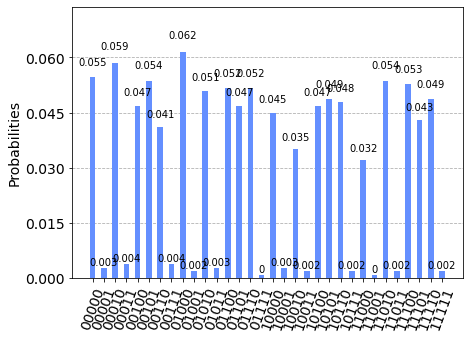

In [102]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grov_qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)